In [21]:
import pandas as pd
%matplotlib inline

In [2]:
!ls

data-exploration.ipynb		ZayoHackathonData_Opportunities.csv
ZayoHackathonData_Accounts.csv	ZayoHackathonData_Services.csv
ZayoHackathonData_CPQs.csv	ZayoHackathonData_Sites.csv


In [3]:
accounts = pd.read_csv('ZayoHackathonData_Accounts.csv')
cpqs = pd.read_csv('ZayoHackathonData_CPQs.csv')
opportunities = pd.read_csv('ZayoHackathonData_Opportunities.csv')
services = pd.read_csv('ZayoHackathonData_Services.csv')
sites = pd.read_csv('ZayoHackathonData_Sites.csv')

In [13]:
accounts_dropna = accounts.dropna()

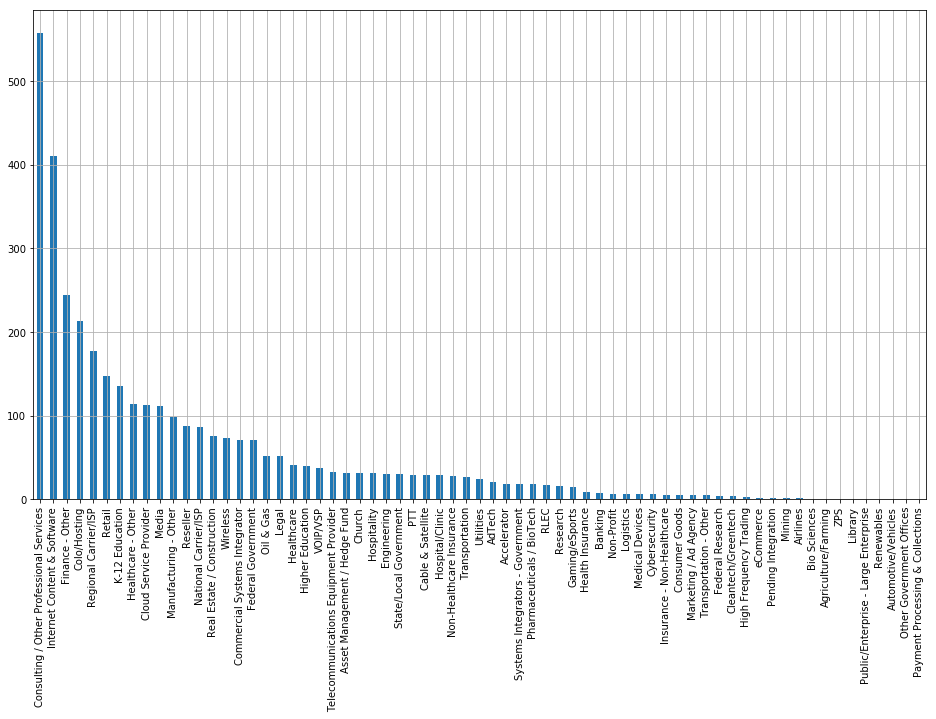

In [22]:
accounts_dropna.Vertical.value_counts().plot(kind='bar', grid=True, figsize=(16, 9))